In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
os.chdir('C:\\Users\\win10')

# Importing the data

In [3]:
d=pd.read_csv('Wine.csv',sep=',',encoding='latin')

In [4]:
d.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
d.shape

(178, 14)

# Checking for missing values

In [6]:
d.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
d.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [8]:
constant_feat=[i for i in d.columns if d[i].std()==0]

In [9]:
constant_feat

[]

In [10]:
d.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Visualizing the target Variable

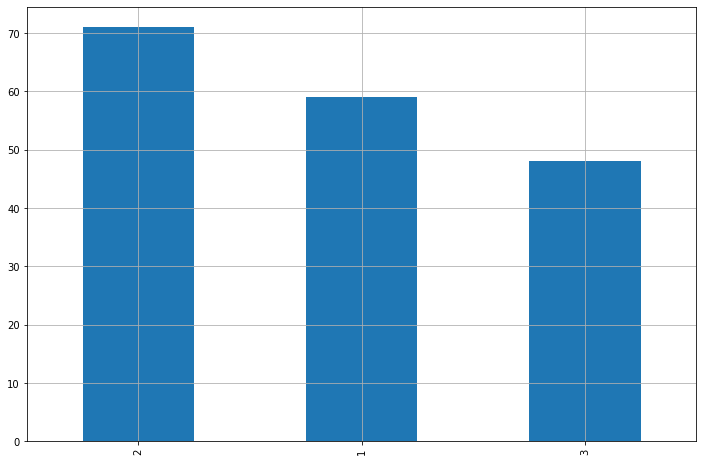

In [22]:
d['Customer_Segment'].value_counts().plot(kind='bar',grid=True,figsize=(12,8))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y=d['Customer_Segment']
x=d.drop(columns=['Customer_Segment'])

# Spliting the data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# Finding the corelated Variables

In [18]:
def Correlation(data,tolerance):
    col_name=set()
    matrix=data.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j])>tolerance:
                col_nm=matrix.columns[i]
                col_name.add(col_nm)
    return col_name

In [19]:
Correlation(x_train,tolerance=0.8)

{'Flavanoids'}

# Droping the corelated Column

In [20]:
x_train.drop(columns=['Flavanoids'],inplace=True)
x_test.drop(columns=['Flavanoids'],inplace=True)

C:\Users\win10\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

# Using Different Scalers

In [28]:
def Scaler(x_train,x_test,scaler=None):
    if scaler is None:
        lg=LogisticRegression()
        lg.fit(x_train,y_train)
        y_pred=lg.predict(x_test)
        print(accuracy_score(y_test,y_pred))
    else:
        x_train_scale=scaler.fit_transform(x_train)
        x_test_scaler=scaler.transform(x_test)
        lg=LogisticRegression()
        lg.fit(x_train_scale,y_train)
        y_pred=lg.predict(x_test_scaler)
        print(accuracy_score(y_test,y_pred))
        

In [29]:
Scaler(x_train,x_test,scaler=None)

0.9259259259259259


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
Scaler(x_train,x_test,scaler=StandardScaler())

0.9814814814814815


In [31]:
Scaler(x_train,x_test,scaler=MinMaxScaler())

0.9629629629629629


In [32]:
Scaler(x_train,x_test,scaler=RobustScaler())

0.9814814814814815


In [33]:
scaler=StandardScaler()

In [34]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [36]:
x_train_scale

array([[-0.16147697,  0.6531251 ,  0.10753629, ..., -1.11518714,
        -1.89030678, -0.72859311],
       [-0.10145556,  0.49181325,  1.21260537, ..., -0.97558234,
        -0.57983341, -0.51404658],
       [ 0.88289567, -0.47605788,  0.14437193, ...,  0.79274509,
         0.28890737,  1.69271778],
       ...,
       [-0.77369542, -0.97791698, -1.66057423, ...,  0.65314029,
         1.14292372, -0.78989212],
       [ 0.58278859, -0.40436372,  0.88108465, ...,  0.65314029,
         1.643554  ,  0.23686629],
       [ 2.17935827, -0.55671381, -0.73968334, ...,  0.46700056,
         0.21528527,  0.84985639]])

# Selecting StandardScaler

In [37]:
lg=LogisticRegression()
lg.fit(x_train_scale,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_pred=lg.predict(x_test_scaler)

In [41]:
accuracy=accuracy_score(y_test,y_pred)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.97        19
           3       1.00      0.95      0.98        21

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [44]:
Results=pd.DataFrame([['Logisticregression',accuracy]],columns=['Model','Accuracy'])

In [45]:
Results

,Model,Accuracy
0,Logisticregression,0.981481


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params={'penalty':['l1','l2'],'C':np.logspace(-3,3,7)}

In [57]:
clf=GridSearchCV(LogisticRegression(),param_grid=params,scoring='accuracy',cv=5)

In [62]:
clf.fit(x_train_scale,y_train)

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\win10\Anaconda3\lib\site-packages\

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [63]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [64]:
clf.best_score_

0.976

In [61]:
logis_1=LogisticRegression(penalty='l2',C=10)

In [65]:
logis_1.fit(x_train,y_train)

C:\Users\win10\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
accuracy_score(logis_1.predict(x_test),y_test)

0.9259259259259259

# Knn Algorithim

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    y_pred=knn.predict(x_test_scaler)
    error_rate.append(np.mean(y_pred!=y_test))

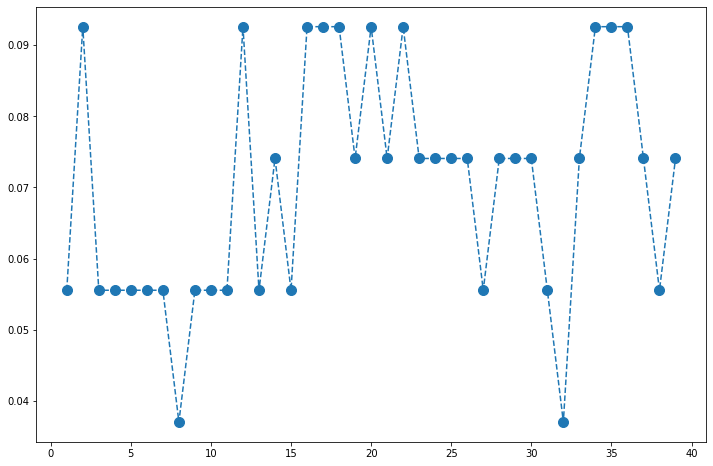

In [48]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,linestyle='dashed',marker='o',markersize=10)

In [53]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [67]:
y_pred=knn.predict(x_test_scaler)
accuracy=accuracy_score(y_pred,y_test)

In [68]:
Results1=pd.DataFrame([['Kneighbours',accuracy]],columns=['Model','Accuracy'])

In [69]:
Results1

,Model,Accuracy
0,Kneighbours,0.351852


In [71]:
Results=Results.append(Results1)

In [72]:
Results

,Model,Accuracy
0,Logisticregression,0.981481
0,Kneighbours,0.351852


# RandomForest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
l=[50,100,150,200,250,300,400]

In [75]:
for i in l:
    rf=RandomForestClassifier(n_estimators=i,oob_score=True)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    print(rf.oob_score_)
    
    

0.967741935483871
0.9516129032258065
0.9758064516129032
0.9758064516129032
0.967741935483871
0.9596774193548387
0.9596774193548387


In [76]:
rf=RandomForestClassifier(n_estimators=200,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_pred=rf.predict(x_test)

In [78]:
accuracy=accuracy_score(y_test,y_pred)

In [79]:
accuracy

1.0

In [80]:
Results2=pd.DataFrame([['Randomforest',accuracy]],columns=['Model','Accuracy'])

In [81]:
Results=Results.append(Results2)

In [82]:
Results

,Model,Accuracy
0,Logisticregression,0.981481
0,Kneighbours,0.351852
0,Randomforest,1.000000


# XGBoost Classifier

In [83]:
import xgboost as xgb

In [84]:
for i in l:
    model=xgb.XGBRFClassifier(n_estimators=i,nthread=10,learning_rate=0.05)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(accuracy_score(y_test,y_pred))

1.0
1.0
1.0
1.0
0.9814814814814815
1.0
0.9814814814814815


In [85]:
xg=xgb.XGBRFClassifier(n_estimators=50,nthread=10,learning_rate=0.05)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [86]:
accuracy=1.0

In [87]:
Results3=pd.DataFrame([['XGBoost',accuracy]],columns=['Model','Accuracy'])

In [88]:
Results=Results.append(Results3)

In [90]:
Results.index=range(0,4)

# Final Result

In [91]:
Results

,Model,Accuracy
0,Logisticregression,0.981481
1,Kneighbours,0.351852
2,Randomforest,1.000000
3,XGBoost,1.000000
